In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import os
import tensorflow as tf
import urllib.request, json
from sklearn.preprocessing import MinMaxScaler

#https://www.datacamp.com/community/tutorials/lstm-python-stock-market

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Stock Prediction Analysis/GOOG_20yrs.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4427 non-null   object 
 1   Open       4427 non-null   float64
 2   High       4427 non-null   float64
 3   Low        4427 non-null   float64
 4   Close      4427 non-null   float64
 5   Adj Close  4427 non-null   float64
 6   Volume     4427 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.2+ KB


In [13]:
data = data.sort_values('Date')
data.head()
data.shape

(4427, 7)

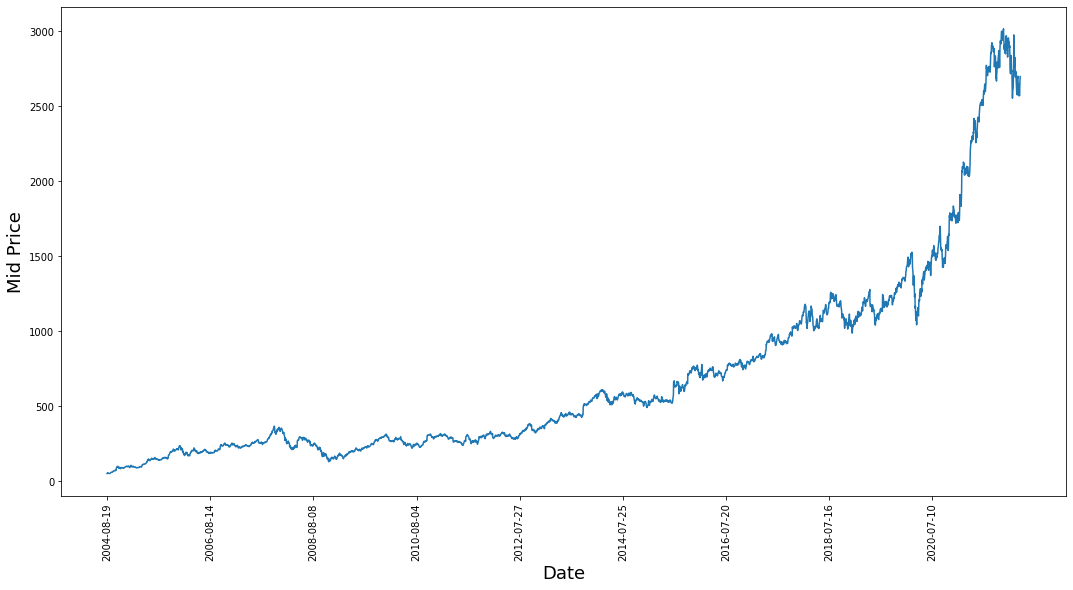

In [6]:
#visualize the data we collected
plt.figure(figsize=(18,9))
plt.plot(range(data.shape[0]), (data['Low'] + data['High'])/2.0)
plt.xticks(range(0, data.shape[0],500), data['Date'].loc[::500], rotation=90)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

## Calculate High and low prices, but before calculate the mid prices

In [7]:
high_prices = data.loc[:,'High'].to_numpy()
low_prices = data.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [8]:
train_data = mid_prices[:3000]
test_data = mid_prices[3000:]

In [9]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

In [10]:
train_data

array([[ 49.81827  ],
       [ 52.1993445],
       [ 55.424753 ],
       ...,
       [722.3974915],
       [728.6600035],
       [732.994995 ]])

In [11]:
test_data

array([[ 739.6149905],
       [ 738.760498 ],
       [ 739.899994 ],
       ...,
       [2629.719971 ],
       [2674.584961 ],
       [2698.4549565]])

In [12]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

ValueError: ignored